In [45]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

In [46]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dataset implementation part
df = pd.read_csv("C:/Users/jahna/Downloads/Datasets for sem2/adult.csv")

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# This line is used to get the information about the dataset
df.info

<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marr

In [8]:
df.shape

(48842, 15)

In [10]:
# calculating the number of unique values in each column of the DataFrame
unique_values = df[['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']].nunique()
print(unique_values)



age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64


In [11]:
# checking the null values
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [14]:
# Encoder categorical columns
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    

In [15]:
print(df)

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25          4  226802          1                7               4   
1       38          4   89814         11                9               2   
2       28          2  336951          7               12               2   
3       44          4  160323         15               10               2   
4       18          0  103497         15               10               4   
...    ...        ...     ...        ...              ...             ...   
48837   27          4  257302          7               12               2   
48838   40          4  154374         11                9               2   
48839   58          4  151910         11                9               6   
48840   22          4  201490         11                9               4   
48841   52          5  287927         11                9               2   

       occupation  relationship  race  gender  capital-gain  capital-loss  

In [16]:
#allocate a features and target variable to x and y
x = np.array(df[['age','workclass','fnlwgt','education','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country']])
y = np.array(df['income'])

In [17]:
#splitting the data into testing and training part
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)


In [18]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Decision Tree

In [19]:
clff = DecisionTreeClassifier()
clff.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
pred_clff = clff.predict(x_test)

In [21]:
clff.score(x_test,y_test)

0.8161531374756884

In [22]:
#classification report
print(classification_report(y_test, pred_clff))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7479
           1       0.60      0.63      0.61      2290

    accuracy                           0.82      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [23]:
pred_clff = clff.predict(x_train)

In [24]:
clff.score(x_train,y_train)

0.999872034397154

# Random Forest

In [25]:
#importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
RFF = RandomForestClassifier()

In [27]:
RFF.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
pred_RFF = RFF.predict(x_test)

In [29]:
#predicting accuracy score for Random Forest
RFF.score(x_test,y_test)

0.8634455932029891

In [30]:
#classification report
print(classification_report(y_test, pred_RFF))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [31]:
pred_RFF = RFF.predict(x_train)

In [32]:
RFF.score(x_train,y_train)

0.9998464412765848

# XGB Classifier

In [33]:
# instantiate the XGBClassifier
modell = xgb.XGBClassifier()

In [34]:
# fit the model on the training data
modell.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
pred_modell = modell.predict(x_test)

In [36]:

modell.score(x_test, y_test)

0.8759340771829256

In [37]:
#classification report
print(classification_report(y_test, pred_modell))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.77      0.68      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769



In [38]:
pred_modell = modell.predict(x_train)

In [39]:
modell.score(x_train,y_train)

0.9003915747447087

# Logistic Regression

In [40]:
# feature scaling 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# creating and fitting the logistic regression model
LG = LogisticRegression()
LG.fit(x_train, y_train)


LogisticRegression()

In [41]:
pred_LG = LG.predict(x_test)

In [42]:
LG.score(x_test,y_test)

0.8272085167366158

In [43]:
#classification report
print(classification_report(y_test, pred_LG))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



In [44]:
pred_LG = LG.predict(x_train)

In [141]:
LG.score(x_train,y_train)

0.8244567860159189

In [146]:
from sklearn.naive_bayes import GaussianNB

In [147]:
# initialize and fit the Gaussian Naive Bayes Classifier
gnbb = GaussianNB()
gnbb.fit(x_train, y_train)

GaussianNB()

In [148]:
pred_gnbb = gnbb.predict(x_test)

In [149]:
gnbb.score(x_test,y_test)

0.8069403214249156

In [150]:
#classification report
print(classification_report(y_test, pred_gnbb))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.68      0.33      0.45      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.79      0.81      0.78      9769



In [151]:
pred_gnbb = gnbb.predict(x_train)

In [152]:
gnbb.score(x_train,y_train)

0.801832467432754

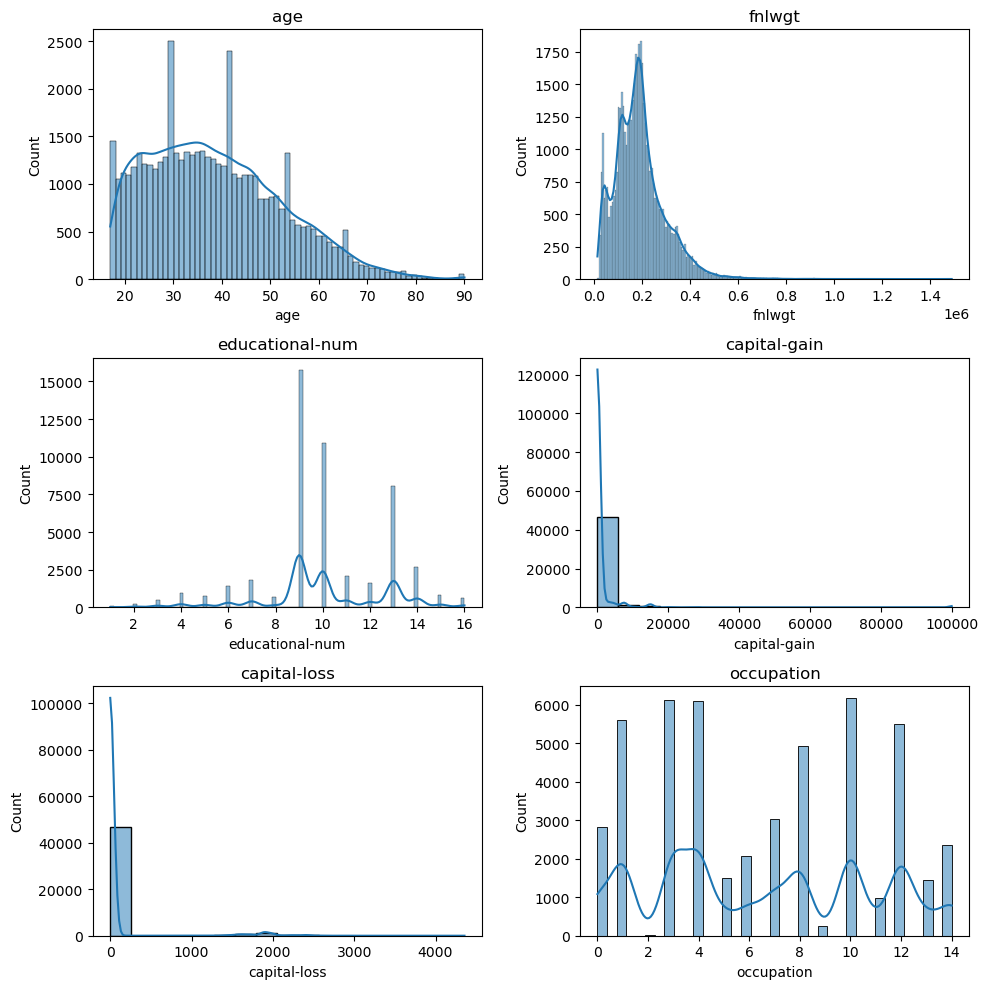

In [158]:
#plotting histograms for numeric columns
numeric_columns = ['age','fnlwgt','educational-num','capital-gain','capital-loss','occupation']
plt.figure(figsize=(10,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

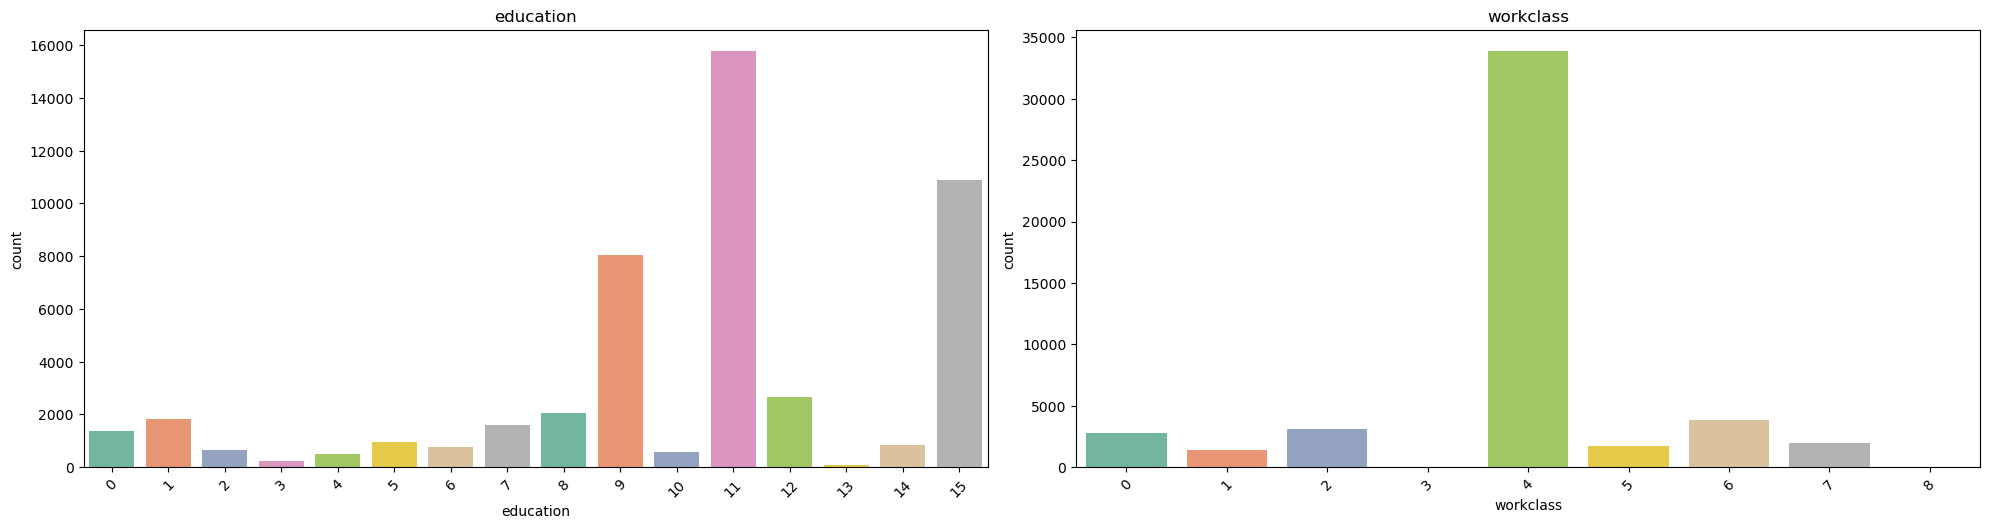

In [161]:
# plotting bar plots for categorical columns
categorical_columns = ['education','workclass']
plt.figure(figsize=(20,20))
for i, col in enumerate(categorical_columns,1):
    plt.subplot(4,2,i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

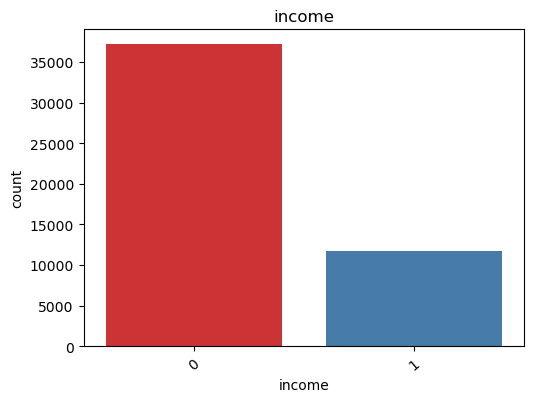

In [171]:
#plotting bar plots for categorical columns
categorical_columns = ['income']
plt.figure(figsize=(10,15))
for i, col in enumerate(categorical_columns,1):
    plt.subplot(4,2,i)
    sns.countplot(data=df, x=col, palette='Set1')
    plt.title(col)
    plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

<Axes: >

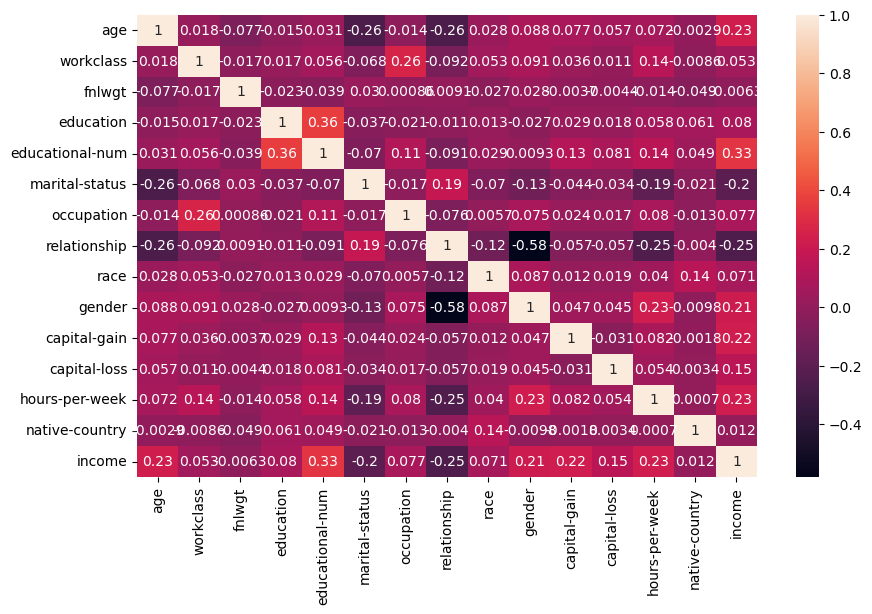

In [172]:
#heatmap graph
hm = df.corr()
fig = plt.figure(figsize=(10,6))
sns.heatmap(hm,annot=True)

In [173]:
# print the shape of the training and testing sets
print("Training set shape:")
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shape:")
print("X_test:", x_test.shape)
print("y_test:", y_test.shape)

Training set shape:
X_train: (39073, 14)
y_train: (39073,)

Testing set shape:
X_test: (9769, 14)
y_test: (9769,)


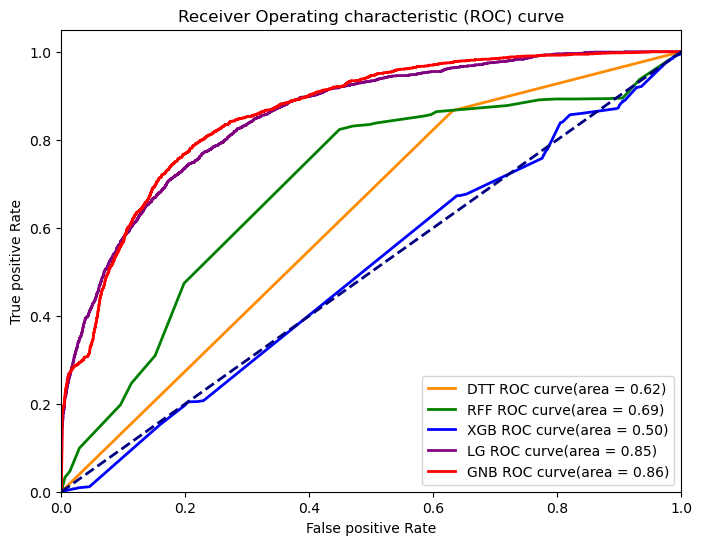

In [176]:
#calculate predicted probabilities for each class
y_pred_proba_DTT = clff.predict_proba(x_test)[:,1]
y_pred_proba_RFF = RFF.predict_proba(x_test)[:,1]
y_pred_proba_XGB = modell.predict_proba(x_test)[:,1]
y_pred_proba_LG = LG.predict_proba(x_test)[:,1]
y_pred_proba_GNB = gnbb.predict_proba(x_test)[:,1]


# calculate ROC curve and AUC for each classifier
fpr_DTT, tpr_DTT, threshold_DTT = roc_curve(y_test, y_pred_proba_DTT)
roc_auc_DTT = auc(fpr_DTT, tpr_DTT)
fpr_RFF, tpr_RFF, threshold_RFF = roc_curve(y_test, y_pred_proba_RFF)
roc_auc_RFF = auc(fpr_RFF, tpr_RFF)
fpr_XGB, tpr_XGB, threshold_XGB = roc_curve(y_test, y_pred_proba_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)
fpr_LG, tpr_LG, threshold_LG = roc_curve(y_test, y_pred_proba_LG)
roc_auc_LG = auc(fpr_LG, tpr_LG)
fpr_GNB, tpr_GNB, threshold_GNB = roc_curve(y_test, y_pred_proba_GNB)
roc_auc_GNB = auc(fpr_GNB, tpr_GNB)

#plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_DTT, tpr_DTT, color='darkorange', lw=2, label=f'DTT ROC curve(area = {roc_auc_DTT:.2f})')
plt.plot(fpr_RFF, tpr_RFF, color='green', lw=2, label=f'RFF ROC curve(area = {roc_auc_RFF:.2f})')
plt.plot(fpr_XGB, tpr_XGB, color='blue', lw=2, label=f'XGB ROC curve(area = {roc_auc_XGB:.2f})')
plt.plot(fpr_LG, tpr_LG, color='purple', lw=2, label=f'LG ROC curve(area = {roc_auc_LG:.2f})')
plt.plot(fpr_GNB, tpr_GNB, color='red', lw=2, label=f'GNB ROC curve(area = {roc_auc_GNB:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [174]:
#reshape the input data into a 2D array
input_data = np.array([28,2,336951,7,12,2,11,0,4,1,0,0,40,39]).reshape(1,-1)

#make predictions using all the algorithms
prediction = RFF.predict(input_data)
prediction = gnbb.predict(input_data)
prediction = LG.predict(input_data)
prediction = modell.predict(input_data)
prediction = clff.predict(input_data)
print(prediction)


[1]
